# Importing Libraries and Modules

In [94]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing,Standardizing
from sklearn.preprocessing import StandardScaler

#For Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Models
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

#Metrics
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

# TRAIN DATA

In [141]:
df=pd.read_excel(r'C:\Users\delkl\Desktop\DataTrained Data Science Projects\Projects\Flight\Data_Train.xlsx')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


# EDA

In [142]:
df.shape

(10683, 11)

There are 10683 rows and 11 columns in the dataset

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


We see there are 1 null values each in Route and Total_Stops. All the independent data types are object and Price is our target variable

In [145]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


We can not observe anything since all are in string format and need to convert it into numerical data

# Univariate analysis

<AxesSubplot:xlabel='Source', ylabel='count'>

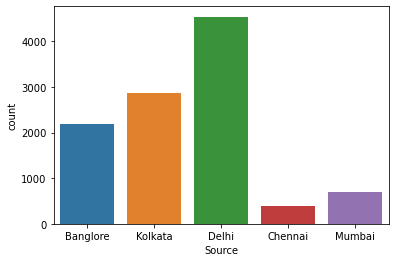

In [146]:
sns.countplot(df['Source'])

Most flights take off from Delhi

<AxesSubplot:xlabel='Destination', ylabel='count'>

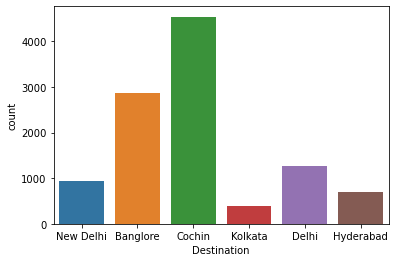

In [147]:
sns.countplot(df['Destination'])

Most flights land in Cochin

<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

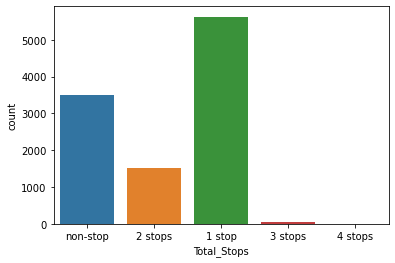

In [150]:
sns.countplot(df['Total_Stops'])

Most flights have 1 stop 

# Bivariate Analysis

<AxesSubplot:xlabel='Destination', ylabel='count'>

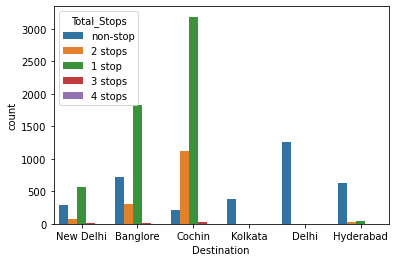

In [156]:
sns.countplot(x='Destination',hue='Total_Stops',data=df)

Flights to Cochin have the most 1 stop flights and flights to Delhi have the most non stop flights

<AxesSubplot:xlabel='Source', ylabel='count'>

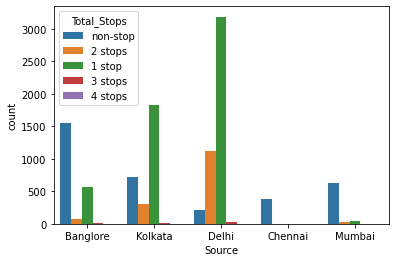

In [157]:
sns.countplot(x='Source',hue='Total_Stops',data=df)

Flights from Bangalore have the most non stops flight

# Preprocessing

In [159]:
df.dropna(inplace=True)

We had just 2 null values so we have dropped them as it wont affect the data

## Extracting Date, Time and Route from the data

In [160]:
df['day']=pd.to_datetime(df["Date_of_Journey"]).dt.day
df['month']=pd.to_datetime(df["Date_of_Journey"]).dt.month
df.drop(columns=['Date_of_Journey'],axis=1,inplace=True)

We have extracted Day and month from Date_of_Journey column and dropped the original column

In [161]:
df['Dep_hour']=pd.to_datetime(df["Dep_Time"]).dt.hour
df['Dep_mint']=pd.to_datetime(df["Dep_Time"]).dt.minute
df.drop(columns=['Dep_Time'],axis=1,inplace=True)

We have extracted hours and minutes from the Dep_Time column and dropped the original column

In [162]:
df['Arrival_hour']=pd.to_datetime(df["Arrival_Time"]).dt.hour
df['Arrival_mint']=pd.to_datetime(df["Arrival_Time"]).dt.minute
df.drop(columns=['Arrival_Time'],axis=1,inplace=True)

We have extracted hours and minutes from the Arrival_Time column and dropped the original column

In [163]:
df['Route_1']=df['Route'].str.split('→ ').str[0]
df['Route_2']=df['Route'].str.split('→ ').str[1]
df['Route_3']=df['Route'].str.split('→ ').str[2]
df['Route_4']=df['Route'].str.split('→ ').str[3]
df['Route_5']=df['Route'].str.split('→ ').str[4]
df.drop(columns=['Route'],axis=1,inplace=True)

Extracting Route and dropping the original column

In [164]:
df['Route_1']=df['Route_1'].fillna('None')
df['Route_2']=df['Route_2'].fillna('None')
df['Route_3']=df['Route_3'].fillna('None')
df['Route_4']=df['Route_4'].fillna('None')
df['Route_5']=df['Route_5'].fillna('None')

Filling Null values with 'None'

In [165]:
duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   
        else:
            duration[i] = "0h " + duration[i]           

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))
    
df["Duration_hours"] = duration_hours
df["Duration_mins"] =duration_mins

Extracted Duration hours and minutes from the Duration column

In [167]:
df.drop(columns=['Duration'],axis=1,inplace=True)

Dropped the original Duration column

## Encoding

In [168]:
from sklearn.preprocessing import LabelEncoder

lab_enc=LabelEncoder()

df1=lab_enc.fit_transform(df['Airline'])
df2=lab_enc.fit_transform(df['Source'])
df3=lab_enc.fit_transform(df['Destination'])
df5=lab_enc.fit_transform(df['Additional_Info'])
df6=lab_enc.fit_transform(df['Route_1'])
df7=lab_enc.fit_transform(df['Route_2'])
df8=lab_enc.fit_transform(df['Route_3'])
df9=lab_enc.fit_transform(df['Route_4'])
df10=lab_enc.fit_transform(df['Route_5'])



df['Airline']=df1
df['Source']=df2
df['Destination']=df3
df['Additional_Info']=df5
df['Route_1']=df6
df['Route_2']=df7
df['Route_3']=df8
df['Route_4']=df9
df['Route_5']=df10

In [169]:
df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

Replaced all the string values to numerical data in the above coding

# Multivariate Analysis

In [109]:
#finding out correlation between the features

corr_df=df.corr()
corr_df.shape

(19, 19)

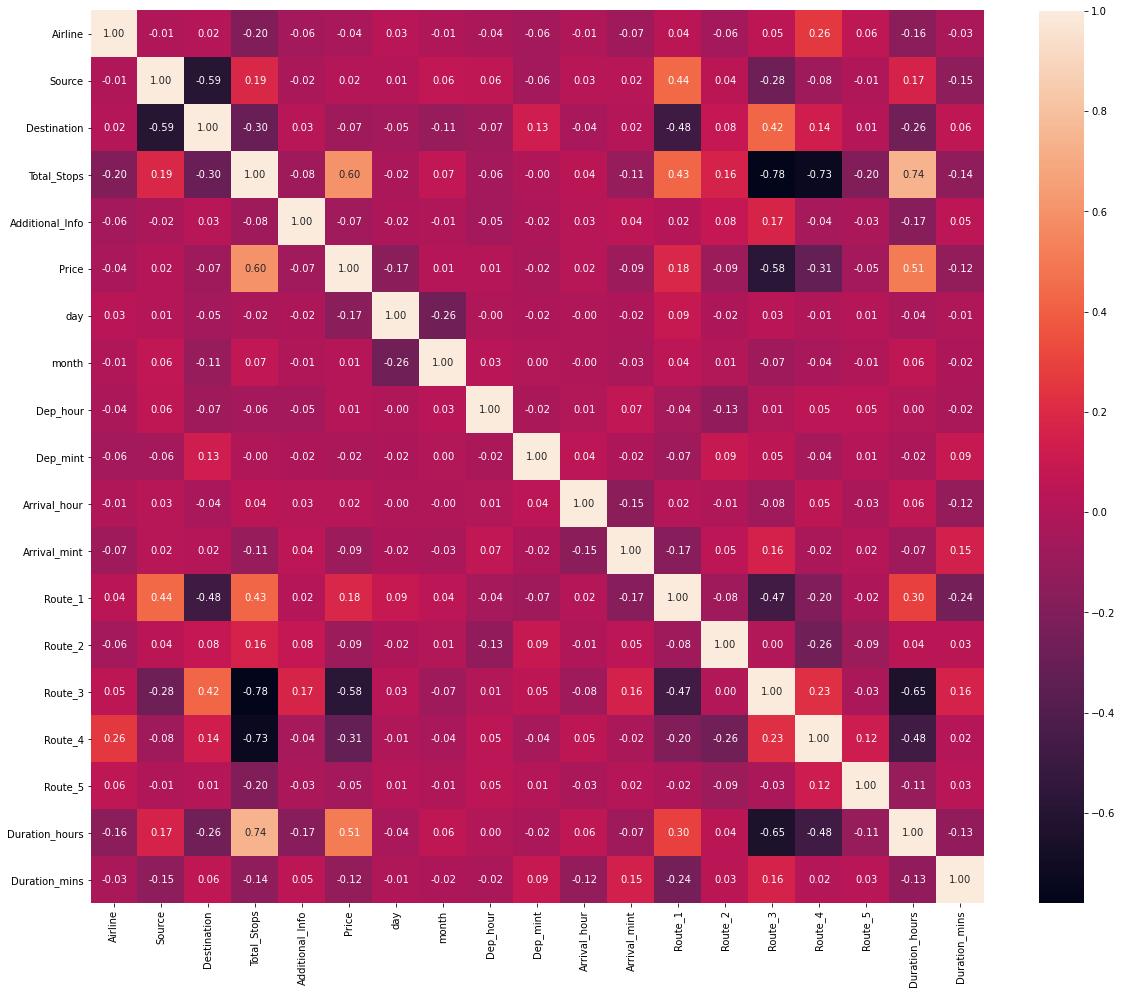

In [110]:
#plotting the heatmap of correlation between features

plt.figure(figsize=(20,20))

sns.heatmap(corr_df,cbar=True,square=True,cbar_kws={'shrink':0.82},fmt='.2f',annot=True,annot_kws={'size':10})
plt.show()

We find a strong collinearity between Total_Stops and Route_3 and Route_4

# Finding Outliers

In [60]:
df_outliers=df[['day','Dep_hour','Dep_mint','Arrival_hour','Arrival_mint','Duration_hours','Duration_mins']]

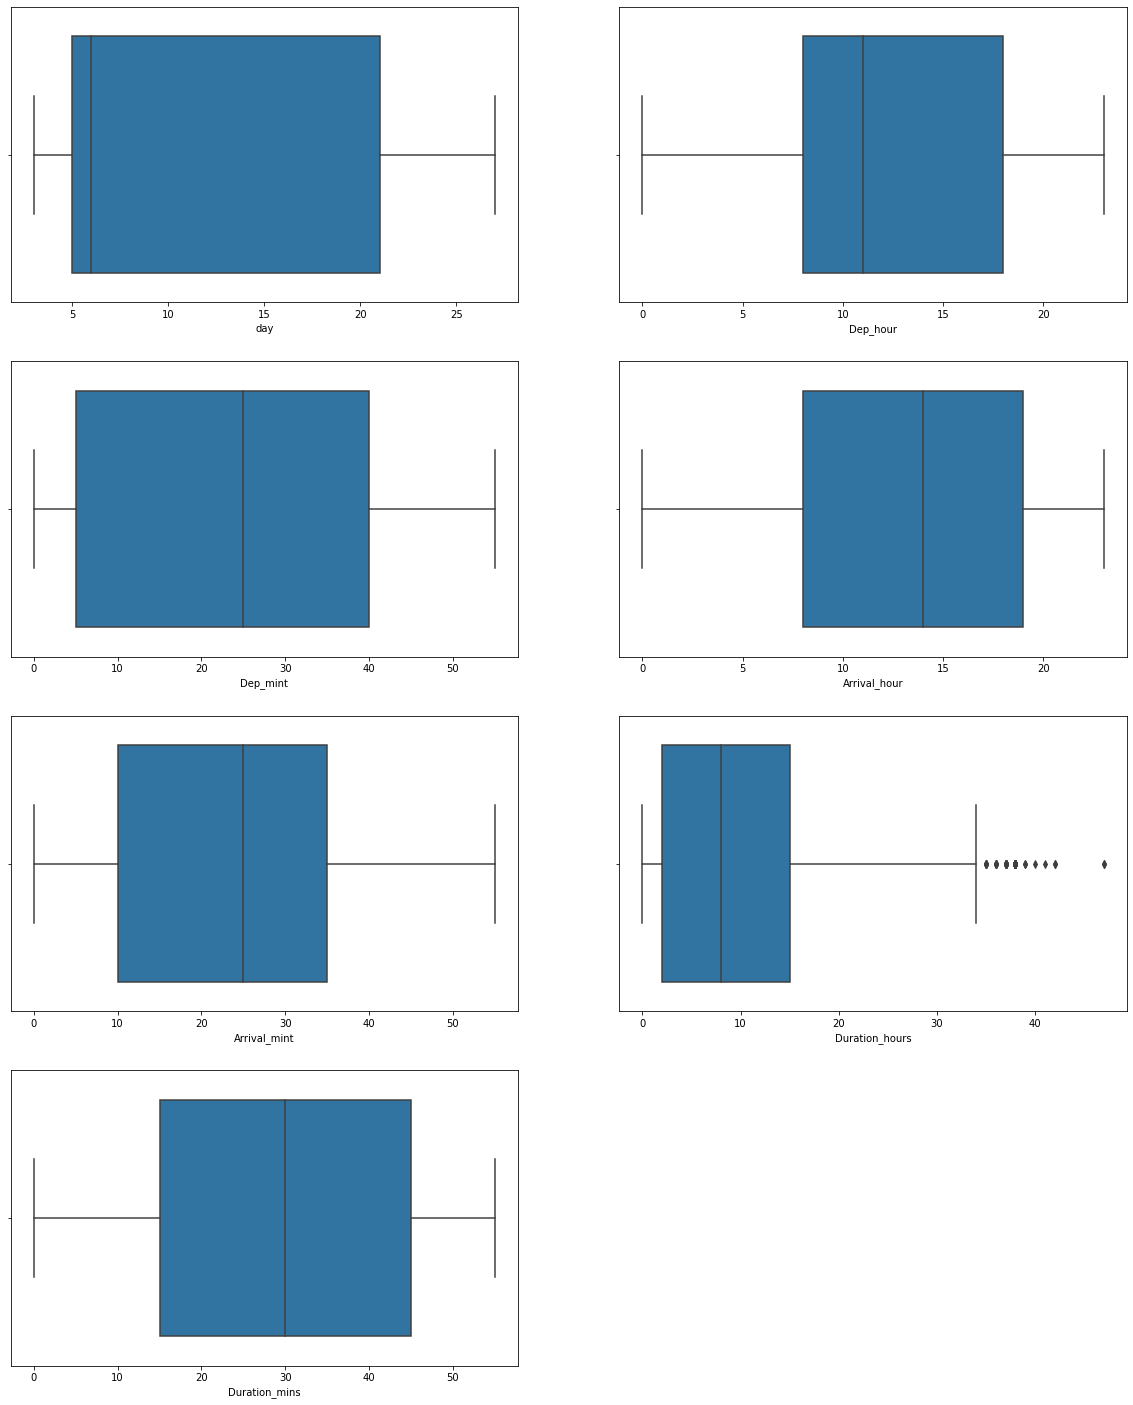

In [62]:
plt.figure(figsize=(20,25))
graph=1

for column in df_outliers:
    if(graph<=8):
        ax=plt.subplot(4,2,graph)
        sns.boxplot(df_outliers[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

We find ouliers only in Duration_hours

# Removing outliers

In [111]:
#Find the IQR (inter quantile range) to identify outliers

q1=df.quantile(0.25) #1st quantile

q3=df.quantile(0.75) #3rd quantile

#IQR
iqr=q3-q1
iqr

Airline               1.0
Source                1.0
Destination           2.0
Total_Stops           1.0
Additional_Info       0.0
Price              7096.0
day                  16.0
month                 3.0
Dep_hour             10.0
Dep_mint             35.0
Arrival_hour         11.0
Arrival_mint         25.0
Route_1               2.0
Route_2               7.0
Route_3              20.0
Route_4               0.0
Route_5               0.0
Duration_hours       13.0
Duration_mins        30.0
dtype: float64

In [112]:
index=np.where(df['Duration_hours']>(q3.Duration_hours)+(1.5*iqr.Duration_hours))
df=df.drop(df.index[index])
print('Shape:',df.shape)
df.reset_index()

Shape: (10609, 19)


,index,Airline,Source,Destination,Total_Stops,Additional_Info,Price,day,month,Dep_hour,Dep_mint,Arrival_hour,Arrival_mint,Route_1,Route_2,Route_3,Route_4,Route_5,Duration_hours,Duration_mins
0,0,3,0,5,0,8,3897,24,3,22,20,1,10,0,13,24,12,4,2,50
1,1,1,3,0,2,8,7662,5,1,5,50,13,15,2,25,1,3,4,7,25
2,2,4,2,1,2,8,13882,6,9,9,25,4,25,3,32,4,5,4,19,0
3,3,3,3,0,1,8,6218,5,12,18,5,23,30,2,34,3,12,4,5,25
4,4,3,0,5,1,8,13302,3,1,16,50,21,35,0,34,8,12,4,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10604,10678,0,3,0,0,8,4107,4,9,19,55,22,25,2,5,24,12,4,2,30
10605,10679,1,3,0,0,8,4145,27,4,20,45,23,20,2,5,24,12,4,2,35
10606,10680,4,0,2,0,8,7229,27,4,8,20,11,20,0,13,24,12,4,3,0
10607,10681,10,0,5,0,8,12648,3,1,11,30,14,10,0,13,24,12,4,2,40


We have removed the outlier

In [170]:
(10682-10609)/10682*100

0.6833926231042875

We have lost only 0.6% data

# Finding Skewness

In [114]:
df.skew()

Airline             0.728518
Source             -0.423567
Destination         1.240062
Total_Stops         0.293058
Additional_Info    -1.774864
Price               1.826360
day                 0.366529
month               0.627753
Dep_hour            0.103334
Dep_mint            0.164375
Arrival_hour       -0.361072
Arrival_mint        0.106817
Route_1            -0.612341
Route_2             1.433181
Route_3             0.577834
Route_4            -2.173149
Route_5           -20.906235
Duration_hours      0.755573
Duration_mins      -0.098067
dtype: float64

We have skewness only in Duration_hours

# Removing Skewness

In [115]:
df['Duration_hours']=np.sqrt(df['Duration_hours'])

In [116]:
df.skew()

Airline             0.728518
Source             -0.423567
Destination         1.240062
Total_Stops         0.293058
Additional_Info    -1.774864
Price               1.826360
day                 0.366529
month               0.627753
Dep_hour            0.103334
Dep_mint            0.164375
Arrival_hour       -0.361072
Arrival_mint        0.106817
Route_1            -0.612341
Route_2             1.433181
Route_3             0.577834
Route_4            -2.173149
Route_5           -20.906235
Duration_hours      0.254858
Duration_mins      -0.098067
dtype: float64

We have removed the skewness

# Splitting the data into features and label

In [117]:
X=df.drop(columns=['Price'],axis=1)
y=df['Price']

We have separated the independent and target variable

In [118]:
#Standardizing

scaler=StandardScaler()
X_scaler=scaler.fit_transform(X)

#Checking multicollinearity by vif

vif=pd.DataFrame()
vif['score']=[variance_inflation_factor(X_scaler,i) for i in range(X_scaler.shape[1])]
vif['Features']=X.columns

vif

,score,Features
0,1.100055,Airline
1,1.698420,Source
2,2.066499,Destination
3,24.542188,Total_Stops
4,1.089863,Additional_Info
5,1.105708,day
6,1.095295,month
7,1.050077,Dep_hour
8,1.043287,Dep_mint
9,1.055650,Arrival_hour


As seen earlier, we see strong collinearity between Total_Stps and Route_3. So dropping Route_3

In [119]:
X.drop(columns=['Route_3'],axis=1,inplace=True)

In [120]:
#Checking multicollinearity by vif

scaler=StandardScaler()
X_scaler=scaler.fit_transform(X)

vif=pd.DataFrame()
vif['score']=[variance_inflation_factor(X_scaler,i) for i in range(X_scaler.shape[1])]
vif['Features']=X.columns

vif

,score,Features
0,1.098436,Airline
1,1.697003,Source
2,1.857875,Destination
3,6.129750,Total_Stops
4,1.086092,Additional_Info
5,1.105686,day
6,1.095287,month
7,1.045491,Dep_hour
8,1.043165,Dep_mint
9,1.055513,Arrival_hour


No collinearity issue

# Model Training

## Finding the best random state

In [121]:
maxAccu=0
maxRs=0
for i in range(1,200):
    X_train,x_test,Y_train,y_test=train_test_split(X_scaler,y,test_size=0.25,random_state=i)
    mod=DecisionTreeRegressor()
    mod.fit(X_train,Y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("Best accuracy is:",maxAccu,"on Random State",maxRs)

Best accuracy is: 0.8814370492041987 on Random State 156


In [122]:
X_train,x_test,Y_train,y_test=train_test_split(X_scaler,y,test_size=0.25,random_state=156)

Splitting the data into train and test set

### Checking accuracy by using different models

In [123]:
DTR=DecisionTreeRegressor()
DTR.fit(X_train,Y_train)
pred=DTR.predict(x_test)
print(r2_score(y_test,pred))

0.8808172950762597


The accuracy of Decision Tree Regressor is 88%

In [124]:
lr=LinearRegression()
lr.fit(X_train,Y_train)
pred=lr.predict(x_test)
print(r2_score(y_test,pred))

0.5406927532481665


The accuracy of Linear Regression is 54%

In [125]:
RFR=RandomForestRegressor()
RFR.fit(X_train,Y_train)
pred=RFR.predict(x_test)
print(r2_score(y_test,pred))

0.9131477796869594


The accuracy of Random Forest Regressor is 91%

In [139]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(X_train,Y_train)
pred=knn.predict(x_test)
print(r2_score(y_test,pred))

0.7663184185763291


The accuracy of KNeighbors Regressor is 77%%

## Regularization

In [129]:
from sklearn.linear_model import Lasso

In [130]:
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [131]:
ls=Lasso(alpha=10,random_state=0)
ls.fit(X_train,Y_train)
ls.score(X_train,Y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
lss

0.5411020927350385

## Cross validation

In [132]:
from sklearn.model_selection import cross_val_score

In [133]:
print(cross_val_score(DTR,X_scaler,y,cv=5).mean())

0.779508556185382


In [134]:
print(cross_val_score(lr,X_scaler,y,cv=5).mean())

0.48967299578255935


In [135]:
print(cross_val_score(RFR,X_scaler,y,cv=5).mean())

0.8794834913502572


In [140]:
print(cross_val_score(knn,X_scaler,y,cv=5).mean())

0.735178921861565


The difference between Accuracy and Cross validation is the least in RFR, so RFR is our best model

## Hyperparameter Tuning

In [175]:
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(X_train,Y_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'log2'}


In [176]:
Final_model=RandomForestRegressor(max_features='log2',criterion='mse')
Final_model.fit(X_train,Y_train)
pred=Final_model.predict(x_test)
acc=r2_score(y_test,pred)
print('Accuracy:',acc*100)

Accuracy: 91.595769145504


We can see the accuracy is little bit improved to 91.5%

# Saving the model

In [180]:
import joblib
joblib.dump(Final_model,"FinalModelFlight.pkl")

['FinalModelFlight.pkl']

# TEST SET

In [181]:
df1=pd.read_excel(r'C:\Users\delkl\Desktop\DataTrained Data Science Projects\Projects\Flight\Test_set.xlsx')
df1

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


# EDA

In [182]:
df1.shape

(2671, 10)

There are 2671 rows and 10 columns in the dataset

In [183]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


There are no null values in the dataset and all are object data types

# Preprocessing

## Extracting Date, Time and Route from the data

In [184]:
df1['day']=pd.to_datetime(df1["Date_of_Journey"]).dt.day
df1['month']=pd.to_datetime(df1["Date_of_Journey"]).dt.month
df1.drop(columns=['Date_of_Journey'],axis=1,inplace=True)

We have extracted Day and month from Date_of_Journey column and dropped the original column

In [185]:
df1['Dep_hour']=pd.to_datetime(df1["Dep_Time"]).dt.hour
df1['Dep_mint']=pd.to_datetime(df1["Dep_Time"]).dt.minute
df1.drop(columns=['Dep_Time'],axis=1,inplace=True)

We have extracted hours and minutes from the Dep_Time column and dropped the original column

In [186]:
df1['Arrival_hour']=pd.to_datetime(df1["Arrival_Time"]).dt.hour
df1['Arrival_mint']=pd.to_datetime(df1["Arrival_Time"]).dt.minute
df1.drop(columns=['Arrival_Time'],axis=1,inplace=True)

We have extracted hours and minutes from the Arrival_Time column and dropped the original column

In [187]:
df1['Route_1']=df1['Route'].str.split('→ ').str[0]
df1['Route_2']=df1['Route'].str.split('→ ').str[1]
df1['Route_3']=df1['Route'].str.split('→ ').str[2]
df1['Route_4']=df1['Route'].str.split('→ ').str[3]
df1['Route_5']=df1['Route'].str.split('→ ').str[4]
df1.drop(columns=['Route'],axis=1,inplace=True)

Extracting Route and dropping the original column

In [188]:
df1['Route_1']=df1['Route_1'].fillna('None')
df1['Route_2']=df1['Route_2'].fillna('None')
df1['Route_3']=df1['Route_3'].fillna('None')
df1['Route_4']=df1['Route_4'].fillna('None')
df1['Route_5']=df1['Route_5'].fillna('None')

Filling Null values with 'None'

In [190]:
duration1 = list(df1["Duration"])

for i in range(len(duration1)):
    if len(duration1[i].split()) != 2:    
        if "h" in duration1[i]:
            duration1[i] = duration1[i].strip() + " 0m"   
        else:
            duration1[i] = "0h " + duration1[i]           

duration1_hours = []
duration1_mins = []
for i in range(len(duration1)):
    duration1_hours.append(int(duration1[i].split(sep = "h")[0]))    
    duration1_mins.append(int(duration1[i].split(sep = "m")[0].split()[-1]))
    
df1["Duration_hours"] = duration1_hours
df1["Duration_mins"] =duration1_mins

Extracted Duration hours and minutes from the Duration column

In [191]:
df1.drop(columns=['Duration'],axis=1,inplace=True)

Dropped the original Duration column

## Encoding

In [194]:
from sklearn.preprocessing import LabelEncoder

lab_enc1=LabelEncoder()

df11=lab_enc1.fit_transform(df1['Airline'])
df12=lab_enc1.fit_transform(df1['Source'])
df13=lab_enc1.fit_transform(df1['Destination'])
df15=lab_enc1.fit_transform(df1['Additional_Info'])
df16=lab_enc1.fit_transform(df1['Route_1'])
df17=lab_enc1.fit_transform(df1['Route_2'])
df18=lab_enc1.fit_transform(df1['Route_3'])
df19=lab_enc1.fit_transform(df1['Route_4'])
df20=lab_enc1.fit_transform(df1['Route_5'])



df1['Airline']=df11
df1['Source']=df12
df1['Destination']=df13
df1['Additional_Info']=df15
df1['Route_1']=df16
df1['Route_2']=df17
df1['Route_3']=df18
df1['Route_4']=df19
df1['Route_5']=df20

In [195]:
df1.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

Replaced all the string values to numerical data in the above coding

# Finding Outliers

In [196]:
df1_outliers=df1[['day','Dep_hour','Dep_mint','Arrival_hour','Arrival_mint','Duration_hours','Duration_mins']]

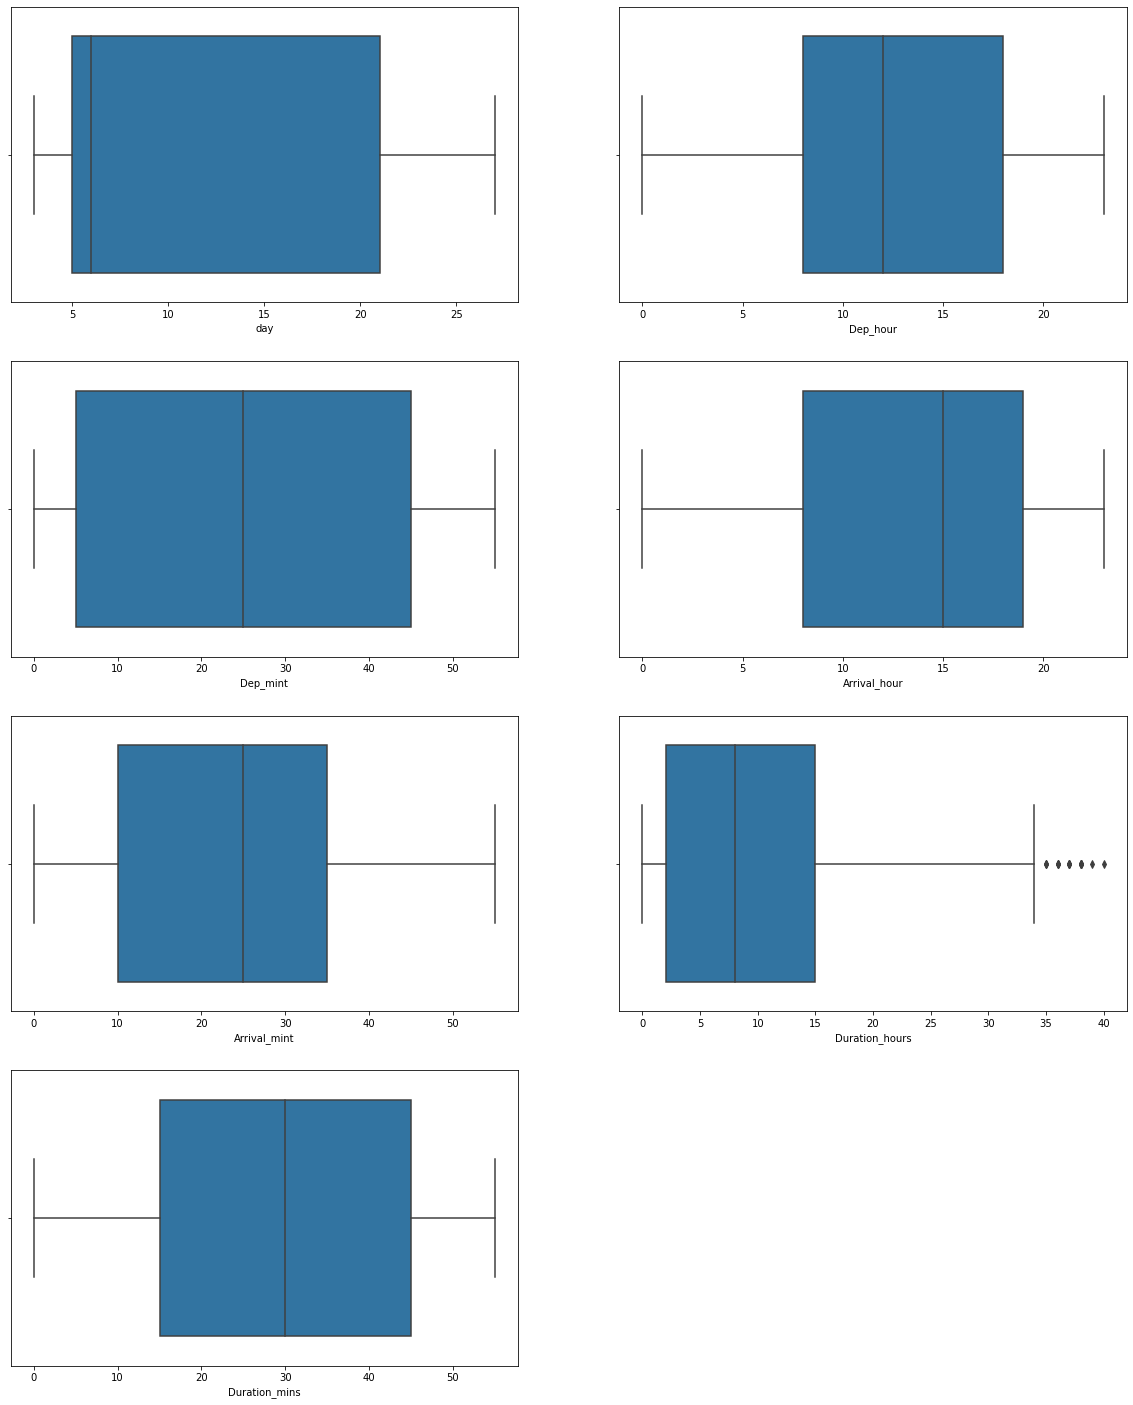

In [197]:
plt.figure(figsize=(20,25))
graph=1

for column in df1_outliers:
    if(graph<=8):
        ax=plt.subplot(4,2,graph)
        sns.boxplot(df1_outliers[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

We find ouliers only in Duration_hours

# Removing Outliers

In [198]:
#Find the IQR (inter quantile range) to identify outliers

q1=df1.quantile(0.25) #1st quantile

q3=df1.quantile(0.75) #3rd quantile

#IQR
iqr1=q3-q1
iqr1

Airline             3.0
Source              1.0
Destination         2.0
Total_Stops         1.0
Additional_Info     0.0
day                16.0
month               3.0
Dep_hour           10.0
Dep_mint           40.0
Arrival_hour       11.0
Arrival_mint       25.0
Route_1             2.0
Route_2             7.0
Route_3            17.0
Route_4             0.0
Route_5             0.0
Duration_hours     13.0
Duration_mins      30.0
dtype: float64

In [200]:
index=np.where(df1['Duration_hours']>(q3.Duration_hours)+(1.5*iqr1.Duration_hours))
df1=df1.drop(df1.index[index])
print('Shape:',df1.shape)
df1.reset_index()

Shape: (2650, 18)


,index,Airline,Source,Destination,Total_Stops,Additional_Info,day,month,Dep_hour,Dep_mint,Arrival_hour,Arrival_mint,Route_1,Route_2,Route_3,Route_4,Route_5,Duration_hours,Duration_mins
0,0,4,2,1,1,5,6,6,17,30,4,25,3,7,5,8,3,10,55
1,1,3,3,0,1,5,5,12,6,20,10,20,2,29,3,8,3,4,0
2,2,4,2,1,1,3,21,5,19,15,19,0,3,7,5,8,3,23,45
3,3,6,2,1,1,5,21,5,8,0,21,0,3,7,5,8,3,13,0
4,4,0,0,2,0,5,24,6,23,55,2,45,0,13,21,8,3,2,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2645,2666,1,3,0,1,5,6,6,20,30,20,25,2,14,3,8,3,23,55
2646,2667,3,3,0,0,5,27,3,14,20,16,55,2,5,21,8,3,2,35
2647,2668,4,2,1,1,5,3,6,21,50,4,25,3,7,5,8,3,6,35
2648,2669,1,2,1,1,5,3,6,4,0,19,15,3,7,5,8,3,15,15


In [201]:
(2671-2650)/2671*100

0.786222388618495

We have lost only 0.7% of data

# Finding skewness

In [202]:
df1.skew()

Airline             0.479301
Source             -0.424279
Destination         1.256786
Total_Stops         0.315024
Additional_Info    -1.720318
day                 0.473589
month               0.593694
Dep_hour            0.085131
Dep_mint            0.134874
Arrival_hour       -0.435443
Arrival_mint        0.110136
Route_1            -0.613121
Route_2             1.183076
Route_3             0.632438
Route_4            -2.230329
Route_5           -18.089538
Duration_hours      0.784816
Duration_mins      -0.109337
dtype: float64

We have skewness only in Duration_hours

# Removing Skewness

In [204]:
df1['Duration_hours']=np.sqrt(df1['Duration_hours'])

In [205]:
df1.skew()

Airline             0.479301
Source             -0.424279
Destination         1.256786
Total_Stops         0.315024
Additional_Info    -1.720318
day                 0.473589
month               0.593694
Dep_hour            0.085131
Dep_mint            0.134874
Arrival_hour       -0.435443
Arrival_mint        0.110136
Route_1            -0.613121
Route_2             1.183076
Route_3             0.632438
Route_4            -2.230329
Route_5           -18.089538
Duration_hours      0.248448
Duration_mins      -0.109337
dtype: float64

We have removed the skewness

In [207]:
#Standardizing

scaler=StandardScaler()
df1_scaler=scaler.fit_transform(df1)

#Checking multicollinearity by vif

vif=pd.DataFrame()
vif['score']=[variance_inflation_factor(df1_scaler,i) for i in range(df1_scaler.shape[1])]
vif['Features']=df1.columns

vif

,score,Features
0,1.137167,Airline
1,1.654932,Source
2,2.082887,Destination
3,19.612377,Total_Stops
4,1.082638,Additional_Info
5,1.099250,day
6,1.092519,month
7,1.069067,Dep_hour
8,1.049090,Dep_mint
9,1.055897,Arrival_hour


As seen earlier, we see strong collinearity between Total_Stps and Route_3. So dropping Route_3

In [208]:
df1.drop(columns=['Route_3'],axis=1,inplace=True)

In [209]:
#Standardizing

scaler=StandardScaler()
df1_scaler=scaler.fit_transform(df1)

#Checking multicollinearity by vif

vif=pd.DataFrame()
vif['score']=[variance_inflation_factor(df1_scaler,i) for i in range(df1_scaler.shape[1])]
vif['Features']=df1.columns

vif

,score,Features
0,1.135266,Airline
1,1.654906,Source
2,1.871526,Destination
3,5.877651,Total_Stops
4,1.079382,Additional_Info
5,1.097220,day
6,1.092368,month
7,1.067327,Dep_hour
8,1.048097,Dep_mint
9,1.055897,Arrival_hour


In [210]:
mod=joblib.load("FinalModelFlight.pkl")
prediction=mod.predict(df1)
prediction=pd.DataFrame(prediction)
prediction.to_csv('ResultsFlight.csv',index=False)